In [1]:
# import numpy as np
# import pandas as pd

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [3]:
df = pd.read_csv('data.csv')
print(df.shape)
df.head()

(801, 20532)


,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [4]:
y = pd.read_csv('labels.csv')
print(y.shape)
y.head()

(801, 2)


,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [5]:
y['Class'].value_counts()

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Class, dtype: int64

# Refining the sample data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20532 entries, Unnamed: 0 to gene_20530
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB


In [7]:
df.isnull().sum()

Unnamed: 0    0
gene_0        0
gene_1        0
gene_2        0
gene_3        0
             ..
gene_20526    0
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Length: 20532, dtype: int64

In [8]:
df.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


# View the labels in the variable

In [9]:
y = y['Class']
print(y)

0      PRAD
1      LUAD
2      PRAD
3      PRAD
4      BRCA
       ... 
796    BRCA
797    LUAD
798    COAD
799    PRAD
800    PRAD
Name: Class, Length: 801, dtype: object


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(y)

# y = le.transform(y)

In [11]:
print(y)

[4 3 4 4 0 4 2 4 0 4 0 2 4 0 0 0 3 2 2 4 0 2 3 0 2 3 1 0 0 0 0 0 2 0 4 0 2
 3 0 0 2 4 4 2 2 0 4 1 0 3 0 3 0 4 1 0 0 1 2 0 3 2 0 3 4 1 0 4 2 0 2 0 0 3
 0 3 0 2 4 1 0 4 0 0 4 4 0 0 2 0 4 4 0 0 0 4 1 0 4 0 0 2 0 2 3 2 3 1 3 3 4
 0 3 4 0 2 2 2 0 0 3 2 3 0 4 4 4 0 2 3 1 0 1 0 0 2 3 0 2 1 0 4 0 2 3 1 4 0
 3 3 3 3 0 0 3 0 0 4 4 3 4 3 2 0 4 3 1 2 3 0 2 3 0 3 0 0 0 4 0 2 1 2 0 4 4
 4 3 3 0 3 3 2 3 4 3 0 0 0 3 3 0 2 2 2 2 4 0 4 0 3 3 0 4 0 4 0 0 0 3 0 2 3
 2 2 3 0 2 4 0 3 3 4 1 0 2 4 2 1 0 2 2 3 4 4 3 3 2 0 0 1 0 4 1 0 4 2 4 4 4
 0 1 1 3 1 1 4 3 0 0 2 2 0 1 4 2 4 0 0 2 0 0 0 0 3 3 0 0 0 2 2 2 2 0 0 0 2
 0 0 3 4 0 0 1 3 4 0 0 0 1 0 4 0 1 3 3 4 2 0 2 2 3 1 2 0 0 0 0 2 0 0 4 0 2
 0 3 4 2 0 4 1 0 0 0 3 3 3 0 0 4 3 0 2 0 1 1 3 0 2 0 0 0 1 3 1 2 4 2 0 0 2
 0 1 4 3 4 0 2 4 0 1 2 2 1 1 4 0 0 1 2 0 4 0 0 0 3 3 2 3 0 2 1 4 0 3 4 0 0
 0 3 0 0 4 0 4 1 0 3 0 0 3 0 0 0 2 3 4 0 4 2 0 2 1 0 4 3 2 0 0 2 0 3 0 0 4
 1 0 2 3 4 0 4 0 0 0 0 2 3 0 2 0 0 3 3 2 1 4 1 0 2 2 0 4 2 1 3 3 0 4 4 0 4
 3 2 4 0 3 4 3 0 0 1 3 2 

In [12]:
print(y.shape)

(801,)


In [13]:
df.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [14]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [15]:
df.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [16]:
cols = df.columns

In [17]:
# from sklearn.preprocessing import MinMaxScaler

# ms = MinMaxScaler()

# df = ms.fit_transform(df)
from sklearn.preprocessing import StandardScaler
df = StandardScaler().fit_transform(df)

In [18]:
df = pd.DataFrame(df, columns=[cols])

In [19]:
df.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,-0.194799,-0.828030,0.159800,-1.948277,1.221575,0.0,-0.207968,0.180910,-0.125376,-0.065633,...,-1.300200,-0.921755,-0.877838,0.996247,-1.166072,0.389441,-0.869566,-1.187938,-0.116483,-0.261901
1,-0.194799,-2.015017,-1.415042,1.353109,-0.376518,0.0,-0.532222,-0.983088,-0.125376,-0.065633,...,-1.747076,-2.392213,-0.831893,0.591649,-2.549598,1.391628,0.623551,-0.342277,-1.656889,-0.261901
2,-0.194799,0.417348,1.156735,0.249807,0.112832,0.0,-0.391297,-0.092995,-0.125376,-0.065633,...,-1.034088,-1.059669,2.248803,0.232601,0.317880,-4.025621,-0.632381,0.886860,-1.855264,-0.261901
3,-0.194799,0.543888,1.326182,-0.099053,0.755741,0.0,0.395348,-0.127831,-0.125376,-0.065633,...,0.241299,0.044905,0.224956,1.719725,-0.263847,-0.521747,-0.793609,0.166174,-1.078941,-0.261901
4,-0.194799,-0.295955,-0.257107,-0.286413,-0.148843,0.0,-0.757118,-0.273165,-0.125376,-0.065633,...,0.133335,0.208252,0.837739,0.979924,0.196645,0.268992,-1.615841,-0.229878,-0.201588,-0.261901


In [40]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib

In [41]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=5,random_state=42)
k_means.fit(df)

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

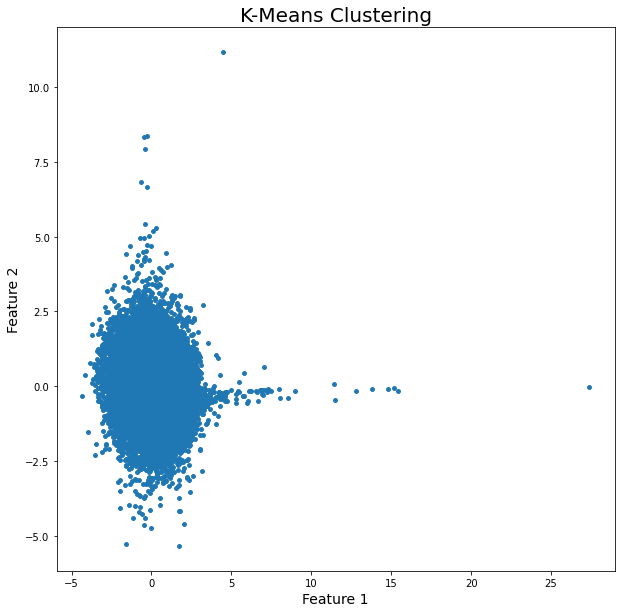

In [45]:
df['KMeans_labels']=k_means.labels_

# Plotting resulting clusters
colors=['purple','red','blue','green','yellow']
plt.figure(figsize=(10,10))
plt.scatter(df.iloc[0],df.iloc[1],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors

from kneed import KneeLocator

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


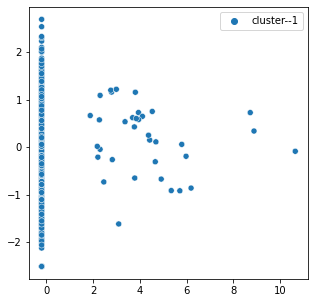

In [51]:
db = DBSCAN(eps=0.5, min_samples=10).fit(X)
labels = db.labels_
u_labels = np.unique(labels)
for i in u_labels:
    fig = plt.figure(figsize=(5, 5))
    sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in labels])
    plt.savefig("dbscan_dumb.png", dpi=300)